## Generazione dato

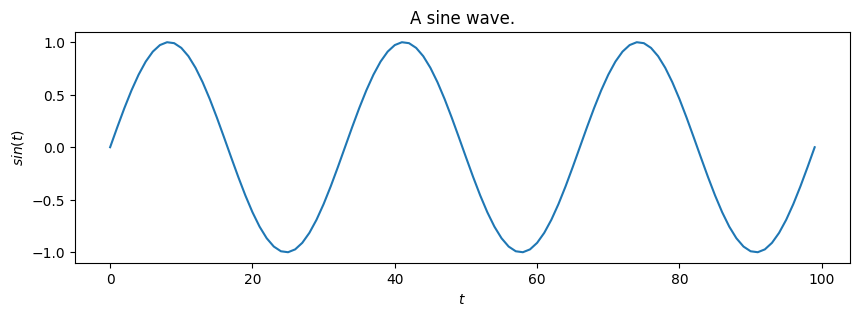

In [66]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

## Inizializzazione reservoir

In [67]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)

questo va inizializzato con la shape dell'input

In [68]:
s = reservoir(X[0].reshape(1, -1))

print("New state vector shape: ", s.shape)

New state vector shape:  (1, 100)


In [69]:
s = reservoir.state()
s.shape

(1, 100)

In [70]:
reservoir.output_dim

100

### E' possibile fittare tutta la serie un sample alla volta

In [71]:
states = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    states[i] = reservoir(X[i].reshape(1, -1))

In [72]:
states.shape

(100, 100)

### Visualizzazione di 20/100 activation functions

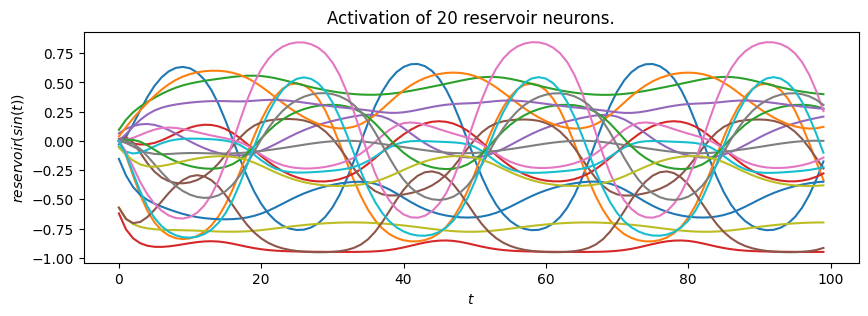

In [73]:
plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:, :20])
plt.show()

### E' possibile fittare tutta la serie in un colpo solo

In [74]:
states = reservoir.run(X)

Running Reservoir-5: 100%|██████████| 100/100 [00:00<00:00, 22431.83it/s]


reset del reservoir senza reinizializzazione

In [75]:
reservoir = reservoir.reset()

reset reservoir con reinizializzazione

In [76]:
states_from_null = reservoir.run(X, reset=True)

Running Reservoir-5: 100%|██████████| 100/100 [00:00<00:00, 23519.90it/s]


### how to restore a previous memory state

In [77]:
a_state_vector = np.random.uniform(-1, 1, size=(1, reservoir.output_dim))

states_from_a_starting_state = reservoir.run(X, from_state=a_state_vector)

Running Reservoir-5: 100%|██████████| 100/100 [00:00<00:00, 25452.42it/s]


to keep memory withour erasing (you could just create a new one) - diciamo che e' un garbage collector fatto a mano :D

In [78]:
previous_states = reservoir.run(X)

with reservoir.with_state(reset=True):
    states_from_null = reservoir.run(X)

# as if the with_state never happened!
states_from_previous = reservoir.run(X)

Running Reservoir-5: 100%|██████████| 100/100 [00:00<00:00, 26139.25it/s]
